In [2]:
from sklearn.model_selection import train_test_split

from LogisticRegressionBinary import *
from LogisticRegressionBinary import _cv_tuning, hyperparameter_tuning
from preprocessing import *
from stats import *

sns.set_theme(style="darkgrid")
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
# Read the data
df = pd.read_csv('../dataset/breast-cancer-wisconsin-processed.csv')
label = pd.read_csv('../dataset/breast-cancer-wisconsin-processed-label.csv')
data = pd.concat([df, label], axis=1)

In [4]:
df.head(), label.head()

(   radius_mean  perimeter_mean  area_mean  concavity_mean  \
 0     0.922336        0.873807   0.932674        0.211538   
 1     0.856620        0.841984   0.830438        0.480526   
 2     0.901426        0.897948   0.908570        0.481986   
 3     0.749085        0.727861   0.694955        0.274343   
 4     0.410052        0.405245   0.310864        0.227994   
 
    concave points_mean  fractal_dimension_mean  radius_se  texture_se  \
 0             0.437469                0.146539   0.364711    0.082589   
 1             0.797382                0.219043   0.535331    0.094303   
 2             0.650249                0.193710   0.545125    0.093065   
 3             0.461347                0.162918   0.282989    0.091275   
 4             0.373130                0.536143   0.398480    0.224717   
 
    perimeter_se   area_se  ...  fractal_dimension_worst  texture_mean_log  \
 0      0.256085  0.510851  ...                 0.362030         -0.222367   
 1      0.371182  0.6623

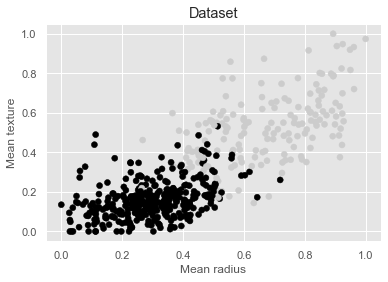

In [5]:
# Plot
plt.title('Dataset')
plt.scatter(df.iloc[:, 0], df.iloc[:, 4], c=label['diagnosis'], cmap='nipy_spectral')
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')

plt.show()

In [6]:
# Split the data with stratified sampling
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

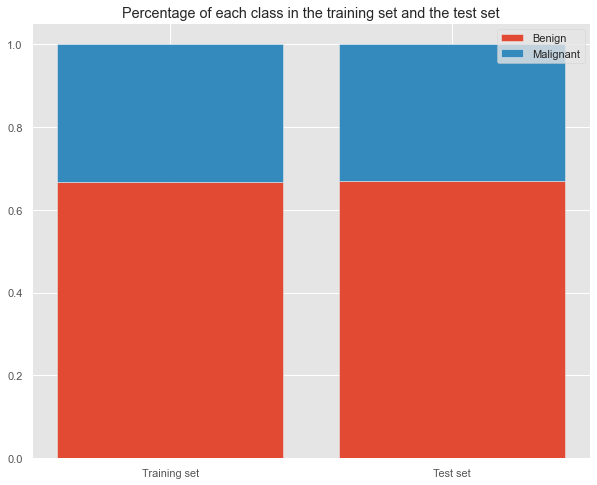

In [9]:
# Plot percentage of each class in the training set and the test set
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Percentage of each class in the training set and the test set')
plt.bar(['Training set', 'Test set'],
        [y_train.value_counts()[0] / len(y_train), y_test.value_counts()[0] / len(y_test)], label='Benign')
plt.bar(['Training set', 'Test set'],
        [y_train.value_counts()[1] / len(y_train), y_test.value_counts()[1] / len(y_test)],
        bottom=[y_train.value_counts()[0] / len(y_train), y_test.value_counts()[0] / len(y_test)], label='Malignant')
plt.legend()
plt.show()

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((410, 30), (410,), (103, 30), (103,))

In [11]:
"""
best_learning_rate, best_number_of_iterations = hyperparameter_tuning(X_train, y_train, X_test, y_test,
                                                                      list_of_learning_rates,
                                                                      list_of_number_of_iterations)
"""
list_of_learning_rates = [0.001, 0.01, 0.1, 1, 5, 10]
list_of_number_of_iterations = [100, 500, 1000]
best_learning_rate, best_number_of_iterations, best_accuracy = _cv_tuning(X_train, y_train,
                                                                          list_of_learning_rates,
                                                                          list_of_number_of_iterations, 10)
print('Best learning rate:', best_learning_rate)
print('Best number of iterations:', best_number_of_iterations)

Best learning rate: 5
Best number of iterations: 1000


In [12]:
# Model
model = MyLogisticRegression(epoch=best_number_of_iterations, learning_rate=best_learning_rate, random_state=42,
                             verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

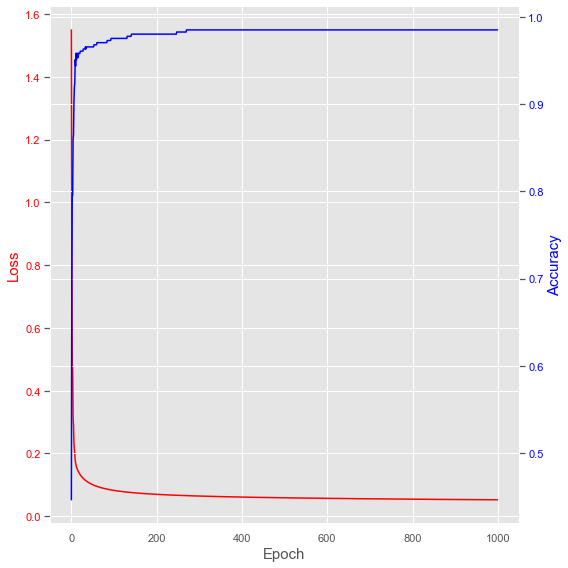

In [13]:
model.loss_auc()

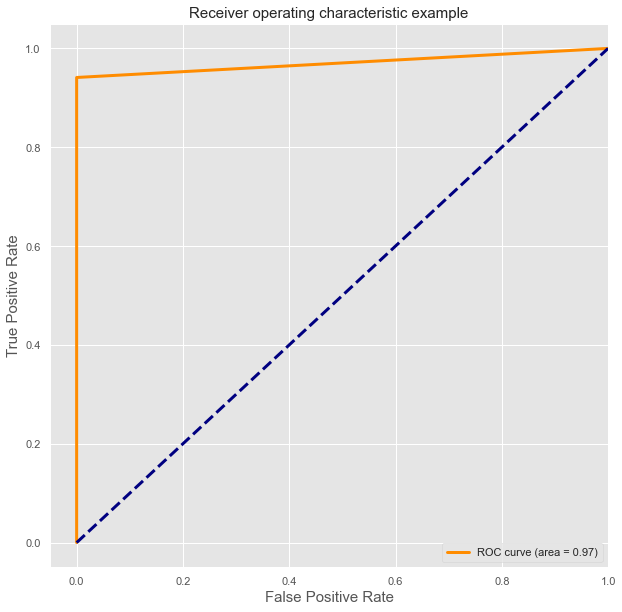

In [14]:
model.roc_curve(y_test, y_pred)

Confusion matrix:
[[69  0]
 [ 2 32]]


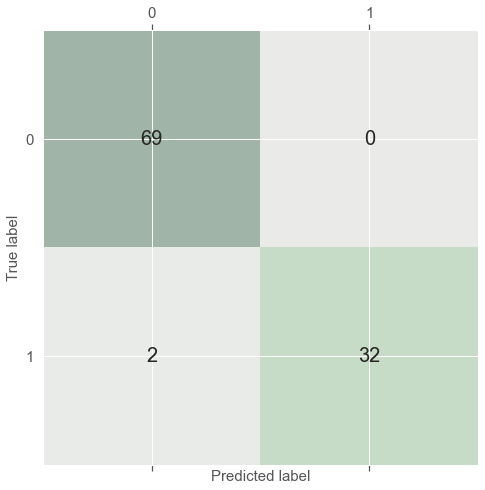

In [15]:
model.confusion_matrix(y_test, y_pred)

In [16]:
model.classification_report(y_test, y_pred)

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.94      0.97        34

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



In [17]:
# best_learning_rate, best_number_of_iterations, best_accuracy

In [18]:
model._cv(X_train, y_train, cv=10)

([0.975609756097561,
  0.975609756097561,
  0.975609756097561,
  1.0,
  0.975609756097561,
  1.0,
  0.9512195121951219,
  1.0,
  0.975609756097561,
  0.926829268292683],
 0.975609756097561)

In [ ]:
model._cv2_learning_curve(X_train, y_train, X_test, y_test, cv=10)